In [1]:
!pip install xgboost

In [2]:
import numpy as np
import pandas as pd
from datetime import datetime as dt
import itertools
import csv
import sys
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
import xgboost as xgb
from sklearn.linear_model import LinearRegression

In [3]:
#Data merging from small csv files.

loc = ""
filename = ""
all_seasons = [0]*50
for i in range(20):
    if(i<9):
        filename = 'EPL_200'+str(i)+'-200'+str(i+1)+'.csv'
    elif(i==9):
        filename = 'EPL_200'+str(i)+'-20'+str(i+1)+'.csv'
    else:
        filename = 'EPL_20'+str(i)+'-20'+str(i+1)+'.csv'
    all_seasons[i] = pd.read_csv(loc + filename, usecols = ['Date','HomeTeam','AwayTeam','FTHG','FTAG','FTR','HTHG','HTAG',
                                                            'HS', 'AS', 'HST', 'AST', 'HC', 'AC', 'HF', 'AF', 'HY', 
                                                            'AY', 'HR' ,'AR'])

j = 20
for i in range(5, 20):
    if(i<9):
        filename = 'LaLiga_200'+str(i)+'-200'+str(i+1)+'.csv'
    elif(i==9):
        filename = 'LaLiga_200'+str(i)+'-20'+str(i+1)+'.csv'
    else:
        filename = 'LaLiga_20'+str(i)+'-20'+str(i+1)+'.csv'
    all_seasons[j] = pd.read_csv(loc + filename, usecols = ['Date','HomeTeam','AwayTeam','FTHG','FTAG','FTR','HTHG','HTAG',
                                                            'HS', 'AS', 'HST', 'AST', 'HC', 'AC', 'HF', 'AF', 'HY', 
                                                            'AY', 'HR' ,'AR'])
    j += 1

for i in range(5, 20):
    if(i<9):
        filename = 'LeChamp_200'+str(i)+'-200'+str(i+1)+'.csv'
    elif(i==9):
        filename = 'LeChamp_200'+str(i)+'-20'+str(i+1)+'.csv'
    else:
        filename = 'LeChamp_20'+str(i)+'-20'+str(i+1)+'.csv'
    all_seasons[j] = pd.read_csv(loc + filename, usecols = ['Date','HomeTeam','AwayTeam','FTHG','FTAG','FTR','HTHG','HTAG',
                                                            'HS', 'AS', 'HST', 'AST', 'HC', 'AC', 'HF', 'AF', 'HY', 
                                                            'AY', 'HR' ,'AR'])
    j += 1

data_set = pd.concat([all_seasons[0], all_seasons[1], all_seasons[2], all_seasons[3], all_seasons[4], all_seasons[5], all_seasons[6]
                               , all_seasons[7], all_seasons[8], all_seasons[9], all_seasons[10], all_seasons[11], all_seasons[12], all_seasons[13]
                               , all_seasons[14], all_seasons[15], all_seasons[16], all_seasons[17], all_seasons[18], all_seasons[19], all_seasons[20]
                               , all_seasons[21], all_seasons[22], all_seasons[23], all_seasons[24], all_seasons[25], all_seasons[26], all_seasons[27]
                               , all_seasons[28], all_seasons[29], all_seasons[30], all_seasons[31], all_seasons[32], all_seasons[33], all_seasons[34],
                           all_seasons[35], all_seasons[36], all_seasons[37], all_seasons[38], all_seasons[39], all_seasons[40], all_seasons[41], 
                            all_seasons[42], all_seasons[43], all_seasons[44], all_seasons[45], all_seasons[46], all_seasons[47], all_seasons[48], 
                            all_seasons[49]], axis=0, join='outer', ignore_index=True, sort=False)

In [4]:
data_set.columns = ['Date','HomeTeam','AwayTeam', 'FullTime_HT_Goal', 'FullTime_AT_Goal', 'FullTime_Res', 'HalfTime_HT_Goal',
                                 'HalfTime_AT_Goal', 'HT_Shots', 'AT_Shots', 'HT_Shots_Target', 'AT_Shots_Target',
                                 'HT_Corner', 'AT_Corner', 'HT_Fouls', 'AT_Fouls', 'HT_Yellow_Cards',
                                 'AT_Yellow_Cards', 'HT_Red_Cards', 'AT_Red_Cards']

In [5]:
data_set.head()

,Date,HomeTeam,AwayTeam,FullTime_HT_Goal,FullTime_AT_Goal,FullTime_Res,HalfTime_HT_Goal,HalfTime_AT_Goal,HT_Shots,AT_Shots,HT_Shots_Target,AT_Shots_Target,HT_Corner,AT_Corner,HT_Fouls,AT_Fouls,HT_Yellow_Cards,AT_Yellow_Cards,HT_Red_Cards,AT_Red_Cards
0,19/08/00,Charlton,Man City,4.0,0.0,H,2.0,0.0,17.0,8.0,14.0,4.0,6.0,6.0,13.0,12.0,1.0,2.0,0.0,0.0
1,19/08/00,Chelsea,West Ham,4.0,2.0,H,1.0,0.0,17.0,12.0,10.0,5.0,7.0,7.0,19.0,14.0,1.0,2.0,0.0,0.0
2,19/08/00,Coventry,Middlesbrough,1.0,3.0,A,1.0,1.0,6.0,16.0,3.0,9.0,8.0,4.0,15.0,21.0,5.0,3.0,1.0,0.0
3,19/08/00,Derby,Southampton,2.0,2.0,D,1.0,2.0,6.0,13.0,4.0,6.0,5.0,8.0,11.0,13.0,1.0,1.0,0.0,0.0
4,19/08/00,Leeds,Everton,2.0,0.0,H,2.0,0.0,17.0,12.0,8.0,6.0,6.0,4.0,21.0,20.0,1.0,3.0,0.0,0.0


In [6]:
data_set.shape

(18700, 20)

In [7]:
#Calculations for rows with minimum 1 Null value-

Total_row_wd_null = 0
for i in range(len(data_set.index)) :
        if data_set.iloc[i].isnull().sum() != 0:
            Total_row_wd_null +=1
print('Total rows with Null values are : ', Total_row_wd_null)

Total rows with Null values are :  7


In [8]:
#Dropping rows with minimum 1 Null value-

final_data_set = data_set.dropna(axis = 0, how ='any')

In [9]:
#Final cleaned dataset dimensions-

final_data_set.shape

(18693, 20)

In [10]:
#Total number of teams in dataset-

total_teams = final_data_set.HomeTeam.unique()
print("Total number of teams in dataset are : ", len(total_teams))
print("Total number of matches taken into account for analysis: ", final_data_set.shape[0])

Total number of teams in dataset are :  122
Total number of matches taken into account for analysis:  18693


Text(0.5, 1.0, 'HomeTeam & AwayTeam goals density plot')

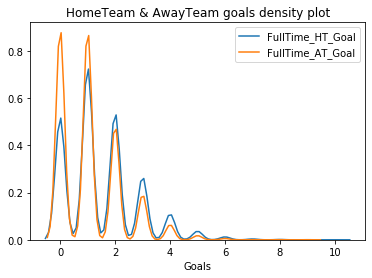

In [11]:
# Density plot on total 'Full Time Home Team goals' and 'Full time Away Team goals'-

for label in ['FullTime_HT_Goal', 'FullTime_AT_Goal']:
  sns.distplot(final_data_set[label], hist=False, label=label)
plt.xlabel('Goals')
plt.title('HomeTeam & AwayTeam goals density plot')

In [12]:
#Calculations to get the mean of Home and Away team goals scored and conceded-

hometeam_goal_scored_mean = final_data_set.FullTime_HT_Goal.sum()*1.0 / final_data_set.shape[0]
awayteam_goal_scored_mean = final_data_set.FullTime_AT_Goal.sum()*1.0 / final_data_set.shape[0]
hometeam_goal_conceded_mean = awayteam_goal_scored_mean
awayteam_goal_conceded_mean = hometeam_goal_scored_mean
print("Average number of goals scored at home",hometeam_goal_scored_mean)
print("Average number of goals scored away", awayteam_goal_scored_mean)
print("Average number of goals conceded at home", hometeam_goal_conceded_mean)
print("Average number of goals conceded away", awayteam_goal_conceded_mean)

Average number of goals scored at home 1.505750815813406
Average number of goals scored away 1.1054405392392874
Average number of goals conceded at home 1.1054405392392874
Average number of goals conceded away 1.505750815813406


In [13]:
#Grouping all the teams from both 'HomeTeam' and 'AwayTeam', to evaluate their respective performance as /
#'HomeTeam' and 'AwayTeam'.

hometeam_performance = final_data_set.groupby('HomeTeam')
awayteam_performance = final_data_set.groupby('AwayTeam')

In [14]:

col_list2 = ['HomeTeam', 'AwayTeam']
data_prep = final_data_set[col_list2]

In [15]:
# Declaring a Dataframe with new column for further analysis- 
#Team, Aggregated Home Goals Scored, Aggregated Away Goals Scored, Team Scoring Strength, Aggregated Home Goals Conceded, 
#Aggregated Away Goals Conceded, Team Defending Strength

teams_perf_analysis = pd.DataFrame(columns=('Team','Matches_played','Agg_HomeTeam_Goals','Agg_AwayTeam_Goals','Home_Scoring_Strength',
                                 'Away_Scoring_Strength','Agg_Home_Goal_Con','Agg_Away_Goal_Con','Home_Defending_Strength'
                                 ,'Away_Defending_Strength',))
teams_perf_analysis

,Team,Matches_played,Agg_HomeTeam_Goals,Agg_AwayTeam_Goals,Home_Scoring_Strength,Away_Scoring_Strength,Agg_Home_Goal_Con,Agg_Away_Goal_Con,Home_Defending_Strength,Away_Defending_Strength


In [16]:
# Analysing each team overall performance:

teams_perf_analysis.Team = hometeam_performance.HomeTeam.min().values
teams_perf_analysis.Matches_played = list(hometeam_performance.HomeTeam.size())
teams_perf_analysis.Agg_HomeTeam_Goals = hometeam_performance.FullTime_HT_Goal.sum().values
teams_perf_analysis.Agg_Home_Goal_Con = hometeam_performance.FullTime_AT_Goal.sum().values
teams_perf_analysis.Agg_AwayTeam_Goals = awayteam_performance.FullTime_AT_Goal.sum().values
teams_perf_analysis.Agg_Away_Goal_Con = awayteam_performance.FullTime_HT_Goal.sum().values

In [17]:
# Home_Scoring_Strength- Ratio of 'Individual team Home Goals scored average' by 'Total Home Goals average'
# Away_Scoring_Strength- Ratio of 'Individual team Away Goals scored average' by 'Total Away Goals average'
# Home_Defending_Strength- Ratio of 'Individual team Home Goals conceded average' by 'Total Away Goals conceded average'
# Away_Defending_Strength- Ratio of 'Individual team Home Goals conceded average' by 'Total Away Goals conceded average'

teams_perf_analysis.Home_Scoring_Strength = (teams_perf_analysis.Agg_HomeTeam_Goals 
                                             / teams_perf_analysis.Matches_played) / hometeam_goal_scored_mean
teams_perf_analysis.Away_Scoring_Strength = (teams_perf_analysis.Agg_AwayTeam_Goals 
                                             / teams_perf_analysis.Matches_played) / awayteam_goal_scored_mean
teams_perf_analysis.Home_Defending_Strength = (teams_perf_analysis.Agg_Home_Goal_Con 
                                             / teams_perf_analysis.Matches_played) / hometeam_goal_conceded_mean
teams_perf_analysis.Away_Defending_Strength = (teams_perf_analysis.Agg_Away_Goal_Con 
                                             / teams_perf_analysis.Matches_played) / awayteam_goal_conceded_mean

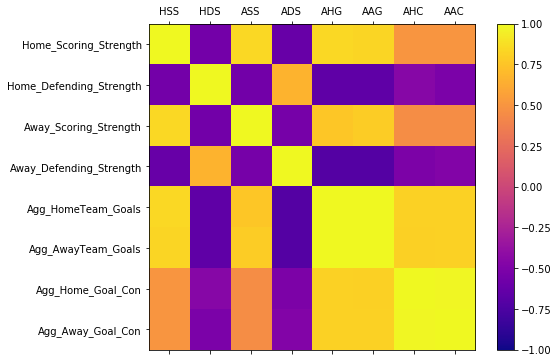

In [18]:
# Correction Matrix Plot

data = teams_perf_analysis[['Home_Scoring_Strength','Home_Defending_Strength','Away_Scoring_Strength',
                            'Away_Defending_Strength','Agg_HomeTeam_Goals', 'Agg_AwayTeam_Goals',
                            'Agg_Home_Goal_Con', 'Agg_Away_Goal_Con']]
correlations = data.corr()
names=list(data)
# plot correlation matrix
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1, cmap='plasma')
fig.colorbar(cax)
ticks = np.arange(0,8,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(['HSS', 'HDS', 'ASS', 'ADS', 'AHG', 'AAG', 'AHC', 'AAC'])
ax.set_yticklabels(names)
plt.show()

In [19]:
teams_perf_analysis_corr = pd.DataFrame(columns=('HSS',  'HDS', 'ASS', 'ADS', 'AHG', 'AAG', 'AHC', 'AAC',))
teams_perf_analysis_corr[['HSS',  'HDS', 'ASS', 'ADS', 'AHG', 'AAG', 'AHC', 'AAC']] = teams_perf_analysis[['Home_Scoring_Strength', 'Home_Defending_Strength','Away_Scoring_Strength', 'Away_Defending_Strength', 'Agg_HomeTeam_Goals', 'Agg_AwayTeam_Goals', 'Agg_Home_Goal_Con', 'Agg_Away_Goal_Con']]

In [20]:
teams_perf_analysis_corr

,HSS,HDS,ASS,ADS,AHG,AAG,AHC,AAC
0,0.690336,1.154577,0.761783,1.223380,79.0,64.0,97.0,140.0
1,0.803935,1.523565,0.666560,0.908796,23.0,14.0,32.0,26.0
2,0.715774,0.985027,0.874463,1.003560,97.0,87.0,98.0,136.0
3,0.809761,1.198220,0.833200,1.252508,139.0,105.0,151.0,215.0
4,0.804608,1.113374,0.626273,1.021724,63.0,36.0,64.0,80.0
...,...,...,...,...,...,...,...,...
117,0.935616,1.186243,0.921685,1.113133,448.0,324.0,417.0,533.0
118,0.738397,1.279557,0.874860,1.166580,169.0,147.0,215.0,267.0
119,0.809020,1.381596,0.904617,1.165230,134.0,110.0,168.0,193.0
120,0.699074,1.380731,0.857005,1.293287,20.0,18.0,29.0,37.0


In [21]:
plt.figure(figsize=(150,50))

rs = np.random.RandomState(0)
data = teams_perf_analysis_corr[['HSS',  'HDS', 'ASS', 'ADS', 'AHG', 'AAG', 'AHC', 'AAC']]
corr = data.corr()
corr.style.background_gradient().set_precision(2)

,HSS,HDS,ASS,ADS,AHG,AAG,AHC,AAC
HSS,1.00,-0.55,0.85,-0.61,0.84,0.83,0.51,0.50
HDS,-0.55,1.00,-0.56,0.67,-0.65,-0.65,-0.45,-0.51
ASS,0.85,-0.56,1.00,-0.54,0.76,0.79,0.46,0.46
ADS,-0.61,0.67,-0.54,1.00,-0.71,-0.70,-0.50,-0.47
AHG,0.84,-0.65,0.76,-0.71,1.00,0.99,0.82,0.82
AAG,0.83,-0.65,0.79,-0.70,0.99,1.00,0.81,0.81
AHC,0.51,-0.45,0.46,-0.50,0.82,0.81,1.00,0.99
AAC,0.50,-0.51,0.46,-0.47,0.82,0.81,0.99,1.00


<Figure size 10800x3600 with 0 Axes>

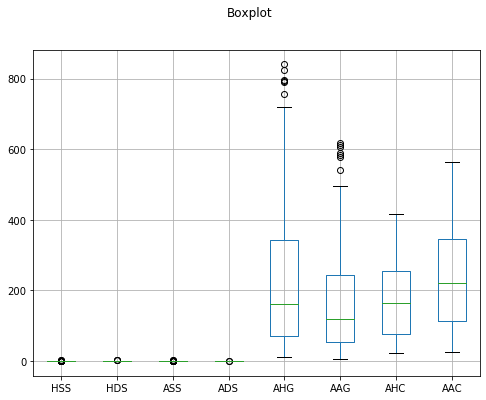

In [22]:
import seaborn as sns
#sns.boxplot(x=feature_table['HAS'])
#sns.boxplot(x=feature_table['HDS'])
# sns.boxplot(x=feature_table['AAS'])
# sns.boxplot(x=feature_table['ADS'])
# sns.boxplot(x=feature_table['AY'])
# sns.boxplot(x=feature_table['HR'])
# sns.boxplot(x=feature_table['AR'])


data = teams_perf_analysis_corr[['HSS',  'HDS', 'ASS', 'ADS', 'AHG', 'AAG', 'AHC', 'AAC']]
bp = data.boxplot(column=['HSS',  'HDS', 'ASS', 'ADS', 'AHG', 'AAG', 'AHC', 'AAC'],figsize=(8,6))
[ax_tmp.set_xlabel('') for ax_tmp in np.asarray(bp).reshape(-1)]
fig = np.asarray(bp).reshape(-1)[0].get_figure()
fig.suptitle('Boxplot')
plt.show()

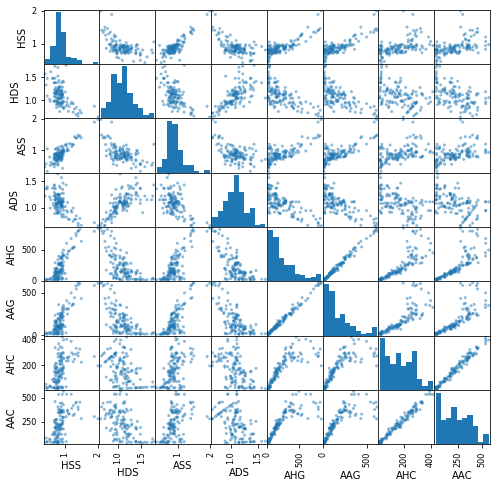

In [23]:
# Plotting Scatter Matrix for all the computed attributes -

scatter_matrix(teams_perf_analysis_corr[['HSS',  'HDS', 'ASS', 'ADS', 'AHG', 'AAG', 'AHC', 'AAC']],figsize=(8,8));

# Modelling on our data set- 

In [24]:
#Changing Categorial attribute 'FullTime_Res' to Numerical for better convenience in terms of calculation.
final_data_set["FullTime_Res"].replace({"H": '1',"A": '-1',"D": '0',}, inplace=True)

c:\users\user\appdata\local\programs\python\python38-32\lib\site-packages\pandas\core\generic.py:6746: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [25]:
# Including independent variable in X_all and dependent variable in Y_all-

X_all = final_data_set[['FullTime_HT_Goal','FullTime_AT_Goal','HT_Shots_Target','AT_Shots_Target','HT_Corner','AT_Corner']]
y_all = final_data_set['FullTime_Res']

#X_all = final_data_set[[FullTime_HT_Goal','FullTime_AT_Goal','FullTime_Res','HalfTime_HT_Goal','HalfTime_AT_Goal','HT_Shots','AT_Shots','HT_Shots_Target','AT_Shots_Target','HT_Corner','AT_Corner','HT_Fouls','AT_Fouls','HT_Yellow_Cards','AT_Yellow_Cards','HT_Red_Cards','AT_Red_Cards']]

In [26]:
final_data_set.head()

,Date,HomeTeam,AwayTeam,FullTime_HT_Goal,FullTime_AT_Goal,FullTime_Res,HalfTime_HT_Goal,HalfTime_AT_Goal,HT_Shots,AT_Shots,HT_Shots_Target,AT_Shots_Target,HT_Corner,AT_Corner,HT_Fouls,AT_Fouls,HT_Yellow_Cards,AT_Yellow_Cards,HT_Red_Cards,AT_Red_Cards
0,19/08/00,Charlton,Man City,4.0,0.0,1,2.0,0.0,17.0,8.0,14.0,4.0,6.0,6.0,13.0,12.0,1.0,2.0,0.0,0.0
1,19/08/00,Chelsea,West Ham,4.0,2.0,1,1.0,0.0,17.0,12.0,10.0,5.0,7.0,7.0,19.0,14.0,1.0,2.0,0.0,0.0
2,19/08/00,Coventry,Middlesbrough,1.0,3.0,-1,1.0,1.0,6.0,16.0,3.0,9.0,8.0,4.0,15.0,21.0,5.0,3.0,1.0,0.0
3,19/08/00,Derby,Southampton,2.0,2.0,0,1.0,2.0,6.0,13.0,4.0,6.0,5.0,8.0,11.0,13.0,1.0,1.0,0.0,0.0
4,19/08/00,Leeds,Everton,2.0,0.0,1,2.0,0.0,17.0,12.0,8.0,6.0,6.0,4.0,21.0,20.0,1.0,3.0,0.0,0.0


In [27]:
X_all.head()

,FullTime_HT_Goal,FullTime_AT_Goal,HT_Shots_Target,AT_Shots_Target,HT_Corner,AT_Corner
0,4.0,0.0,14.0,4.0,6.0,6.0
1,4.0,2.0,10.0,5.0,7.0,7.0
2,1.0,3.0,3.0,9.0,8.0,4.0
3,2.0,2.0,4.0,6.0,5.0,8.0
4,2.0,0.0,8.0,6.0,6.0,4.0


In [28]:
X_all.shape

(18693, 6)

In [29]:
y_all.shape

(18693,)

In [30]:
# Separate into feature set and target variable
#FTR = Full Time Result (H=Home Win, D=Draw, A=Away Win)
#X_all = final_data.drop(['FTR'],1)
#y_all = X_all['FTR']
#Z_all = X_all.drop(['Date','HomeTeam','AwayTeam'],1)

# print(X_all)
# print(y_all)
# print(Z_all)

# Standardising the data.
from sklearn.preprocessing import scale

#Center to the mean and component wise scale to unit variance.
#cols = [['FTHG','FTAG','HTHG','HTAG','HS','AS','HST','AST','HC','AC']]
for col in X_all:
    X_all[col] = scale(X_all[col])

<ipython-input-30-73b5d78abdbc>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_all[col] = scale(X_all[col])
<ipython-input-30-73b5d78abdbc>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_all[col] = scale(X_all[col])
<ipython-input-30-73b5d78abdbc>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexin

In [31]:
from sklearn.model_selection import train_test_split

# Shuffle and split the dataset into training and testing set.


X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, test_size = .2,random_state=42)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(14954, 6) (14954,)
(3739, 6) (3739,)


In [32]:
#for measuring training time
from time import time 
# F1 score (also F-score or F-measure) is a measure of a test's accuracy. 
#It considers both the precision p and the recall r of the test to compute 
#the score: p is the number of correct positive results divided by the number of 
#all positive results, and r is the number of correct positive results divided by 
#the number of positive results that should have been returned. The F1 score can be 
#interpreted as a weighted average of the precision and recall, where an F1 score 
#reaches its best value at 1 and worst at 0.
from sklearn.metrics import f1_score

def train_classifier(clf, X_train, y_train):
    ''' Fits a classifier to the training data. '''
    
    # Start the clock, train the classifier, then stop the clock
    start = time()
    clf.fit(X_train, y_train)
    end = time()
    
    # Print the results
    print ("Trained model in {:.4f} seconds".format(end - start))

    
def predict_labels(clf, features, target):
    ''' Makes predictions using a fit classifier based on F1 score. '''
    
    # Start the clock, make predictions, then stop the clock
    start = time()
    y_pred = clf.predict(features)
    
    end = time()
    # Print and return results
    print ("Made predictions in {:.4f} seconds.".format(end - start))
    
    return f1_score(target, y_pred, average='macro'), sum(target == y_pred) / float(len(y_pred))


def train_predict(clf, X_train, y_train, X_test, y_test):
    ''' Train and predict using a classifer based on F1 score. '''
    
    # Indicate the classifier and the training set size
    print ("Training a {} using a training set size of {}. . .".format(clf.__class__.__name__, len(X_train)))
    
    # Train the classifier
    train_classifier(clf, X_train, y_train)
    
    # Print the results of prediction for both training and testing
    f1, acc = predict_labels(clf, X_train, y_train)
    print (f1, acc)
    print ("F1 score and accuracy score for training set: {:.4f} , {:.4f}.".format(f1 , acc))
    
    f1, acc = predict_labels(clf, X_test, y_test)
    print ("F1 score and accuracy score for test set: {:.4f} , {:.4f}.".format(f1 , acc))

In [33]:
import xgboost as xgb
# Initialize the three models (XGBoost is initialized later)
clf_A = LogisticRegression(random_state = 42)
clf_B = SVC(random_state = 912, kernel='rbf')
#Boosting refers to this general problem of producing a very accurate prediction rule 
#by combining rough and moderately inaccurate rules-of-thumb

clf_C = xgb.XGBClassifier(seed = 82)

train_predict(clf_A, X_train, y_train, X_test, y_test)
print('')
train_predict(clf_B, X_train, y_train, X_test, y_test)
print('')
train_predict(clf_C, X_train, y_train, X_test, y_test)
print('')

Training a LogisticRegression using a training set size of 14954. . .
Trained model in 0.3261 seconds
Made predictions in 0.0030 seconds.
1.0 1.0
F1 score and accuracy score for training set: 1.0000 , 1.0000.
Made predictions in 0.0010 seconds.
F1 score and accuracy score for test set: 1.0000 , 1.0000.

Training a SVC using a training set size of 14954. . .
Trained model in 0.7546 seconds
Made predictions in 0.3026 seconds.
1.0 1.0
F1 score and accuracy score for training set: 1.0000 , 1.0000.
Made predictions in 0.0718 seconds.
F1 score and accuracy score for test set: 1.0000 , 1.0000.

Training a XGBClassifier using a training set size of 14954. . .
Trained model in 0.7260 seconds
Made predictions in 0.0269 seconds.
1.0 1.0
F1 score and accuracy score for training set: 1.0000 , 1.0000.
Made predictions in 0.0070 seconds.
F1 score and accuracy score for test set: 1.0000 , 1.0000.



In [34]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Score 0.7313400707497706


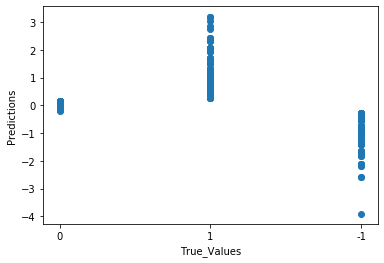

In [35]:
# fit a model  ###########   Linear Regression Starts
lm = LinearRegression()
model = lm.fit(X_train, y_train)
predictions = lm.predict(X_test)
predictions[0:5]
## The line / model
plt.scatter(y_test, predictions)
plt.xlabel("True_Values")
plt.ylabel("Predictions")
print("Score", model.score(X_test, y_test))

In [36]:
xg_reg = xgb.XGBClassifier(objective='binary:logistic',seed=82, 
                               alpha = 10, learning_rate = 0.01,
                                n_estimators=100,
                          )

train_predict(xg_reg, X_train, y_train, X_test, y_test)
print('')

Training a XGBClassifier using a training set size of 14954. . .
Trained model in 0.8227 seconds
Made predictions in 0.0220 seconds.
0.9982844155525202 0.9985288217199412
F1 score and accuracy score for training set: 0.9983 , 0.9985.
Made predictions in 0.0050 seconds.
F1 score and accuracy score for test set: 0.9971 , 0.9976.



In [37]:
# instantiate the model (using the default parameters)
logreg = LogisticRegression()

# fit the model with data
logreg.fit(X_train,y_train)

#
y_pred=logreg.predict(X_test)

In [38]:
logreg.score(X_train,y_train)

1.0

In [39]:
from sklearn.metrics import confusion_matrix, classification_report

print(confusion_matrix(y_test,y_pred))
print("\n")
print(classification_report(y_test,y_pred))


print("Training set score for Logistic Regression: %f" % logreg.score(X_train,y_train))
print("Testing set score for Logistic Regression: %f" % logreg.score(X_test,y_test))

[[1026    0    0]
 [   0  970    0]
 [   0    0 1743]]


              precision    recall  f1-score   support

          -1       1.00      1.00      1.00      1026
           0       1.00      1.00      1.00       970
           1       1.00      1.00      1.00      1743

    accuracy                           1.00      3739
   macro avg       1.00      1.00      1.00      3739
weighted avg       1.00      1.00      1.00      3739

Training set score for Logistic Regression: 1.000000
Testing set score for Logistic Regression: 1.000000


In [40]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
%matplotlib inline  
from sklearn.svm import SVC
from sklearn import linear_model

In [41]:
#Libraries to Build Ensemble Model : Random Forest Classifier 
# Create the parameter grid based on the results of random search 
params_grid = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]},
                    {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]

In [42]:
# Import train_test_split function
from sklearn.model_selection import train_test_split

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2,random_state=109) # 70% training and 30% test

In [43]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score, GridSearchCV

# Performing CV to tune parameters for best SVM fit 
svm_model = GridSearchCV(SVC(), params_grid, cv=5)
svm_model.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']},
                         {'C': [1, 10, 100, 1000], 'kernel': ['linear']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [44]:
# View the accuracy score
print('Best score for training data:', svm_model.best_score_,"\n") 

# View the best parameters for the model found using grid search  
print('Best C:',svm_model.best_estimator_.C,"\n") 
print('Best Kernel:',svm_model.best_estimator_.kernel,"\n")
print('Best Gamma:',svm_model.best_estimator_.gamma,"\n")

final_model = svm_model.best_estimator_
y_pred = final_model.predict(X_test)

Best score for training data: 1.0 

Best C: 1 

Best Kernel: rbf 

Best Gamma: 0.001 



In [45]:
# View the accuracy score
print('Best score for training data:', svm_model.best_score_,"\n") 

# View the best parameters for the model found using grid search  
print('Best C:',svm_model.best_estimator_.C,"\n") 
print('Best Kernel:',svm_model.best_estimator_.kernel,"\n")
print('Best Gamma:',svm_model.best_estimator_.gamma,"\n")

final_model = svm_model.best_estimator_
y_pred = final_model.predict(X_test)

Best score for training data: 1.0 

Best C: 1 

Best Kernel: rbf 

Best Gamma: 0.001 



In [46]:
from sklearn.metrics import confusion_matrix,classification_report

# Making the Confusion Matrix
#print(pd.crosstab(Y_test_label, Y_pred_label, rownames=['Actual Activity'], colnames=['Predicted Activity']))
print(confusion_matrix(y_test,y_pred))
print("\n")
print(classification_report(y_test,y_pred))

print("Training set score for SVM: %f" % final_model.score(X_train, y_train))
print("Testing  set score for SVM: %f" % final_model.score(X_test, y_test ))

svm_model.score

[[ 833    0    0]
 [   0  792    0]
 [   0    0 1366]]


              precision    recall  f1-score   support

          -1       1.00      1.00      1.00       833
           0       1.00      1.00      1.00       792
           1       1.00      1.00      1.00      1366

    accuracy                           1.00      2991
   macro avg       1.00      1.00      1.00      2991
weighted avg       1.00      1.00      1.00      2991

Training set score for SVM: 1.000000
Testing  set score for SVM: 1.000000


<bound method BaseSearchCV.score of GridSearchCV(cv=5, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']},
                         {'C': [1, 10, 100, 1000], 'kernel': ['linear']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)>

In [47]:
# Feature Extraction with RFE
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings("ignore")

In [48]:
X_columns = ['FullTime_HT_Goal','FullTime_AT_Goal','HalfTime_HT_Goal','HalfTime_AT_Goal','HT_Shots','AT_Shots','HT_Shots_Target','AT_Shots_Target','HT_Corner','AT_Corner','HT_Fouls','AT_Fouls','HT_Yellow_Cards','AT_Yellow_Cards','HT_Red_Cards','AT_Red_Cards']
Y_columns = ['FullTime_Res']

XX = final_data_set[X_columns]
YY = final_data_set[Y_columns]


In [49]:
#array = final_data.values
#names = list(feature_selection.columns.values)
XX = XX
YY = YY
model = LogisticRegression()
rfecv = RFECV(model, 6)
fit = rfecv.fit(XX, YY) 
#names=list(feature_selection)
#names.remove('FTHG')
#names.remove('FTAG')
#names.remove('Result')
print(fit.n_features_)
print(fit.support_)
print(fit.ranking_)


fmt = '{:<8}{:<20}{}'

print(' ')
print(fmt.format('', 'Ranking', 'Feature Name'))
for i, (name, grade) in enumerate(zip(rfecv.ranking_, X_columns)):
    print(fmt.format(i, name, grade))
    

4
[ True  True  True  True False False False False False False False False
 False False False False]
[1 1 1 1 2 3 2 2 3 2 3 3 3 3 2 2]
 
        Ranking             Feature Name
0       1                   FullTime_HT_Goal
1       1                   FullTime_AT_Goal
2       1                   HalfTime_HT_Goal
3       1                   HalfTime_AT_Goal
4       2                   HT_Shots
5       3                   AT_Shots
6       2                   HT_Shots_Target
7       2                   AT_Shots_Target
8       3                   HT_Corner
9       2                   AT_Corner
10      3                   HT_Fouls
11      3                   AT_Fouls
12      3                   HT_Yellow_Cards
13      3                   AT_Yellow_Cards
14      2                   HT_Red_Cards
15      2                   AT_Red_Cards


In [50]:
# Shuffle and split the dataset into training and testing set.


X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, test_size = .2,random_state=42)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(14954, 6) (14954,)
(3739, 6) (3739,)


The mean accuracy and the standard deviation of LogisticRegression: 1.000000 (0.000000)
The mean accuracy and the standard deviation of LinearDiscriminantAnalysis:LDA: 0.916012 (0.005750)
The mean accuracy and the standard deviation of KNeighborsClassifier:KNN: 0.986575 (0.010067)
The mean accuracy and the standard deviation of DecisionTreeClassifier:CART: 1.000000 (0.000000)
The mean accuracy and the standard deviation of GaussianNB:NB: 0.812342 (0.025740)
The mean accuracy and the standard deviation of GaussianNB:SVM: 0.999840 (0.000245)
 




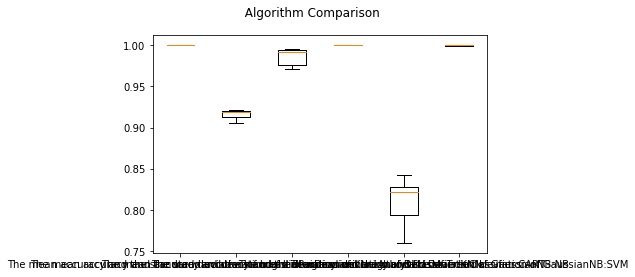

In [58]:
X = X_all
Y = y_all
# prepare configuration for cross validation test harness
seed = 7
# prepare models
models = []
models.append(('The mean accuracy and the standard deviation of LogisticRegression', LogisticRegression()))
models.append(('The mean accuracy and the standard deviation of LinearDiscriminantAnalysis:LDA', LinearDiscriminantAnalysis()))
models.append(('The mean accuracy and the standard deviation of KNeighborsClassifier:KNN', KNeighborsClassifier()))
models.append(('The mean accuracy and the standard deviation of DecisionTreeClassifier:CART', DecisionTreeClassifier()))
models.append(('The mean accuracy and the standard deviation of GaussianNB:NB', GaussianNB()))
models.append(('The mean accuracy and the standard deviation of GaussianNB:SVM', SVC()))
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
	kfold = model_selection.KFold(n_splits=10, random_state=seed)
	cv_results = model_selection.cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)
# boxplot algorithm comparison

print(' \n\n')
fig = plt.figure()
fig.suptitle('          Algorithm Comparison           ')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)

plt.show()
